## Movie data analyst


In [37]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [21]:
# Load dataset
df = pd.read_csv("n_movies.csv")


In [22]:
# basics info
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (9957, 9)
Columns: Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [23]:
# Finding missing value
df.isnull().sum()



title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate numeric and categorical
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns

# Numeric: median
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical/Text: most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [25]:
df.isnull().sum()

title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64

In [26]:
# 📌 Step 3: Clean year column
# Extract only the first year number
df['year'] = df['year'].str.extract(r'(\d{4})').astype(float)


# 📌 Step 4: Clean duration (remove 'min' and convert to int)
df['duration'] = df['duration'].str.replace(" min", "", regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')


# 📌 Step 5: Clean votes (remove commas and convert to int)
df['votes'] = df['votes'].str.replace(",", "", regex=False)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


# 📌 Step 6: Clean stars (remove brackets and quotes)
df['stars'] = df['stars'].str.strip("[]").str.replace("'", "").str.split(",")


df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"[Ralph Macchio, , William Zabka, , Courtne...",177031
1,The Crown,2016.0,TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"[Claire Foy, , Olivia Colman, , Imelda Sta...",199885
2,Better Call Saul,2015.0,TV-MA,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"[Bob Odenkirk, , Rhea Seehorn, , Jonathan ...",501384
3,Devil in Ohio,2022.0,TV-MA,356,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"[Emily Deschanel, , Sam Jaeger, , Gerardo ...",9773
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"[Zach Aguilar, , Kenichiro Ohashi, , Emi L...",15413


In [27]:
# 📌 Step 7: Summary statistics
print(df[['year', 'duration', 'rating', 'votes']].describe())

              year     duration       rating         votes
count  9853.000000  9957.000000  9957.000000  9.957000e+03
mean   2016.021212    70.955609     6.780476  1.722676e+04
std       8.318350    45.189515     1.141868  8.249735e+04
min    1932.000000     1.000000     1.700000  5.000000e+00
25%    2015.000000    46.000000     6.200000  1.300000e+02
50%    2018.000000    60.000000     6.900000  8.420000e+02
75%    2020.000000    93.000000     7.500000  4.260000e+03
max    2025.000000   990.000000     9.900000  1.844075e+06


In [28]:
# 📌 Step 8: Top 10 movies by rating
top10 = df.sort_values(by='rating', ascending=False).head(10)
print(top10[['title', 'year', 'rating', 'votes']])

                           title    year  rating    votes
9444             BoJack Horseman  2014.0     9.9    16066
9578             Stranger Things  2016.0     9.6    36276
8161  Avatar: The Last Airbender  2005.0     9.6     5221
8259                      Dexter  2006.0     9.6    10604
17                          1899  2022.0     9.6      853
8907  Avatar: The Last Airbender  2005.0     9.6     3953
8557    JoJo's Bizarre Adventure  2012.0     9.6     1442
7                   Breaking Bad  2008.0     9.5  1831340
9951                Breaking Bad  2008.0     9.5  1831359
8819                        Dark  2017.0     9.5    14007


In [29]:
# 📌 Step 9: Most popular genres (split by comma)
all_genres = df['genre'].dropna().str.split(",").explode().str.strip()
genre_counts = all_genres.value_counts().head(10)
print(genre_counts)

genre
Drama          4194
Comedy         3171
Action         1969
Adventure      1563
Crime          1491
Animation      1434
Documentary    1349
Romance        1007
Thriller        889
Mystery         768
Name: count, dtype: int64


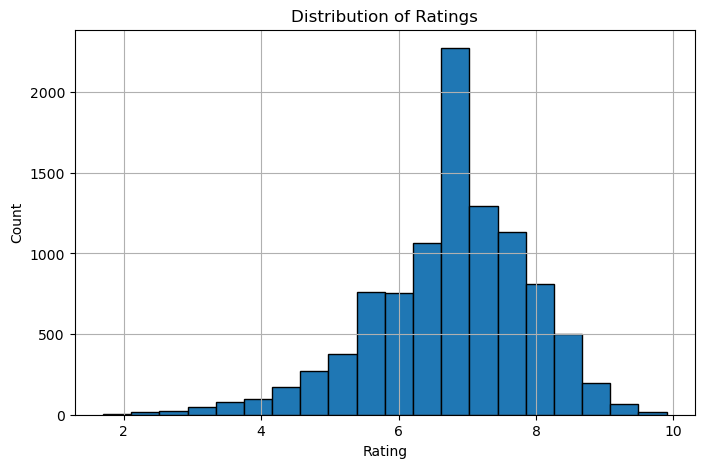

In [30]:
# 📌 Step 10: Rating distribution
plt.figure(figsize=(8,5))
df['rating'].hist(bins=20, edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

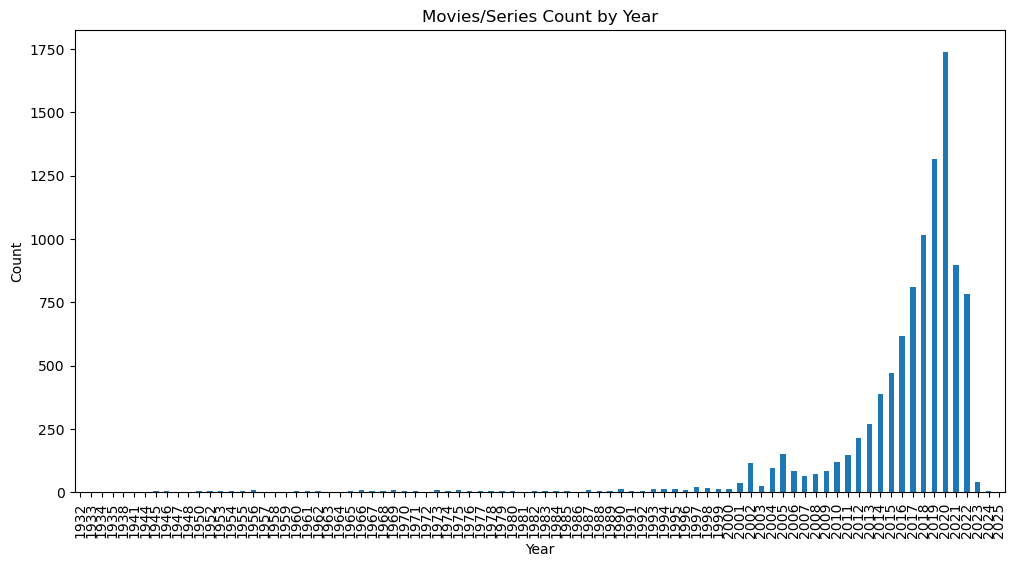

In [31]:
# 📌 Step 11: Movies count by year
plt.figure(figsize=(12,6))
df['year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.title("Movies/Series Count by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

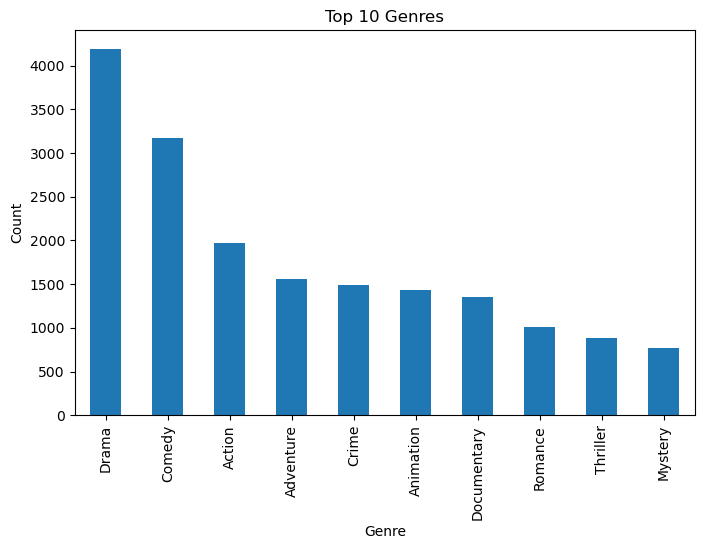

In [32]:
# 📌 Step 12: Top 10 Genres
plt.figure(figsize=(8,5))
genre_counts.plot(kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [38]:
# --- Model-Based Collaborative Filtering (NMF) ---


# 📌 Step 7: Build user-item rating matrix
# For demo, simulate userId from index (since no real user data is present)
df['userId'] = df.index
user_item_matrix = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

In [39]:
# 📌 Step 8: Train-test split
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)


# Convert to numpy arrays
train_matrix_np = train_matrix.values

In [40]:
# 📌 Step 9: Train NMF model
nmf = NMF(n_components=20, init='random', random_state=42, max_iter=200)
user_features = nmf.fit_transform(train_matrix_np)
item_features = nmf.components_

In [41]:
# 📌 Step 10: Reconstruct ratings
reconstructed_matrix = np.dot(user_features, item_features)

In [42]:
# 📌 Step 11: Evaluate model (RMSE on train set)
mse = mean_squared_error(train_matrix_np.flatten(), reconstructed_matrix.flatten())
rmse = np.sqrt(mse)
print("Training RMSE:", rmse)

Training RMSE: 0.07419910075285181


In [60]:
# 📌 Step 12: Recommend movies for a user
def recommend_movies(user_index, n=5):
    user_ratings = reconstructed_matrix[user_index]
    top_indices = np.argsort(user_ratings)[::-1][:n]
    recommended = [user_item_matrix.columns[i] for i in top_indices]
    return recommended


# Example recommendation for user 0
print("Recommended movies for User 3:")
print(recommend_movies(3, 5))

Recommended movies for User 3:
['Johnny Test', 'Rick and Morty', 'The Queen and the Conqueror', 'Love Alarm', 'Bridgerton']


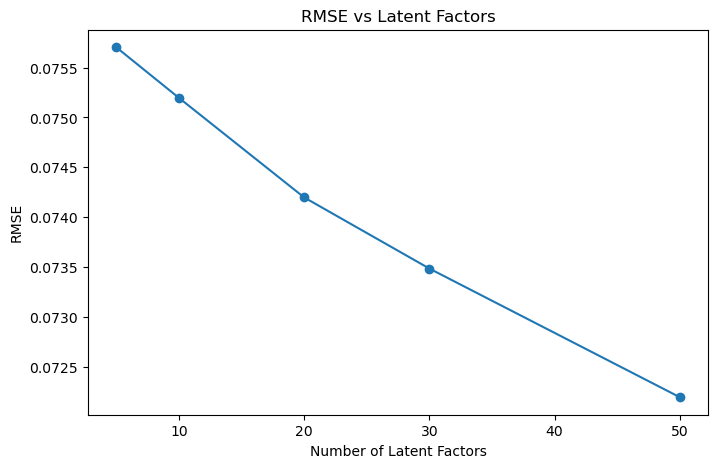

In [57]:
import seaborn as sns

# 📊 1. RMSE vs. Latent Factors
rmses = []
factors = [5, 10, 20, 30, 50]
for k in factors:
    nmf_temp = NMF(n_components=k, init='random', random_state=42, max_iter=200)
    user_temp = nmf_temp.fit_transform(train_matrix_np)
    item_temp = nmf_temp.components_
    recon_temp = np.dot(user_temp, item_temp)
    mse_temp = mean_squared_error(train_matrix_np.flatten(), recon_temp.flatten())
    rmses.append(np.sqrt(mse_temp))

plt.figure(figsize=(8,5))
plt.plot(factors, rmses, marker='o')
plt.title("RMSE vs Latent Factors")
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.show()

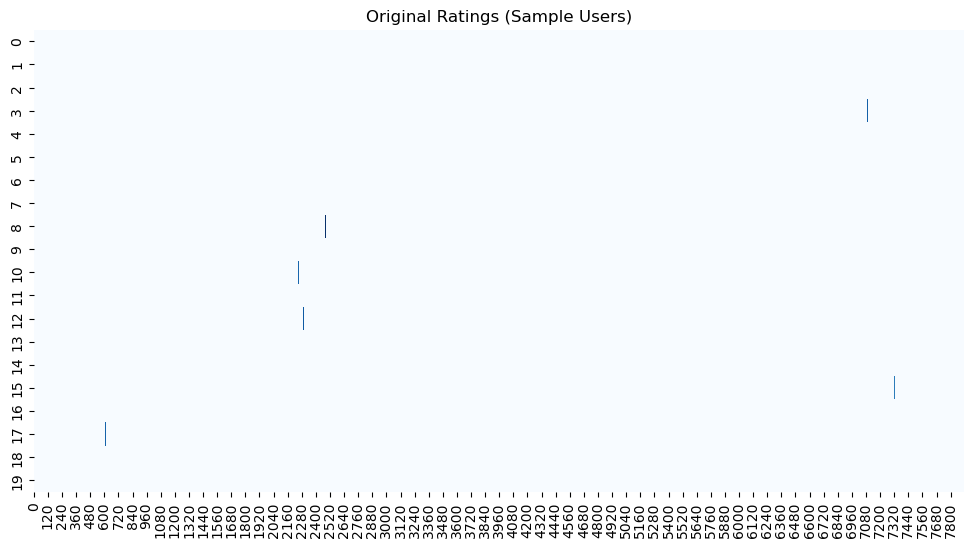

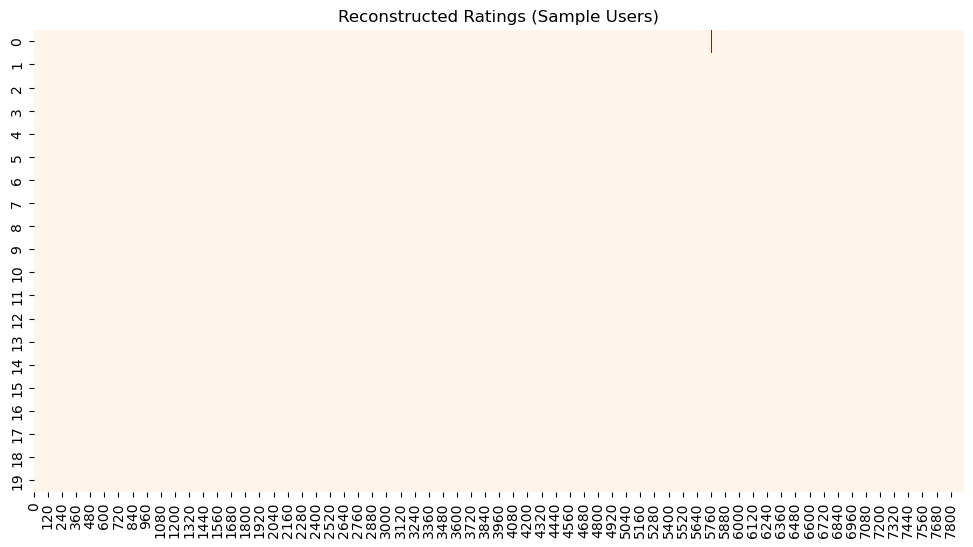

In [58]:
# 📊 2. Heatmap of Original vs Reconstructed Ratings (sample)
sample_users = slice(0, 20)
plt.figure(figsize=(12,6))
sns.heatmap(train_matrix_np[sample_users], cmap="Blues", cbar=False)
plt.title("Original Ratings (Sample Users)")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(reconstructed_matrix[sample_users], cmap="Oranges", cbar=False)
plt.title("Reconstructed Ratings (Sample Users)")
plt.show()

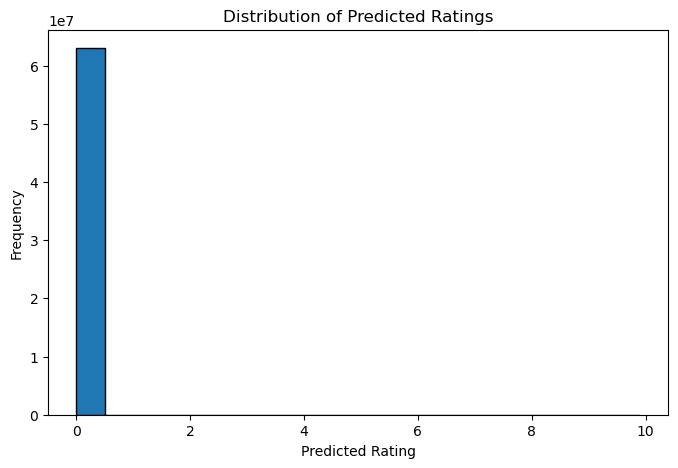

In [59]:
# 📊 3. Distribution of Predicted Ratings
plt.figure(figsize=(8,5))
plt.hist(reconstructed_matrix.flatten(), bins=20, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()